<a href="https://colab.research.google.com/github/Vale150299/ARS/blob/main/METRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# connect google drive where datasets are stored
import os, sys
from google.colab import drive
drivedir='/content/drive'
drive.mount(drivedir)
os.chdir(drivedir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00


In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [32]:
datadir=drivedir+'/MyDrive/METERS/2024METRS_project_data/juelich/'
libsdir_path=drivedir+'/MyDrive/METERS/2024METRS_project_data/juelich/'
print (os.listdir(datadir))

['cloudnet_lwp', 'cloudnet_iwc', 'surface_rad', 'cloudnet_class']


In [33]:
import os

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# List the contents of the cloudnet_iwc directory
surface_rad_contents = os.listdir(surface_rad_dir)

# Print the contents
print(surface_rad_contents)

['sups_joy_pyr00_l1_rsds_v01_20230111000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230105000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230110000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230107000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230106000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230108000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230102000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230101000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230109000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230103000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230104000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230121000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230113000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230115000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230201000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230117000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230112000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230114000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230128000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230130000000.nc', 'sups_joy_pyr00_l1_rsds_v01_20230129000

In [ ]:
import os
import xarray as xr

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# Define the pattern to match the filenames of the NetCDF files you want to open
jue_lw = 'sups_joy_pyrg00_l1_rlds*.nc'

# Use open_mfdataset to open and concatenate the files into a single dataset
jue_lw = xr.open_mfdataset(os.path.join(surface_rad_dir, jue_lw))

# Print the combined dataset to see the structure
print(jue_lw)


<xarray.Dataset>
Dimensions:     (time: 6298538, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(17280, 2), meta=np.ndarray>
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rlds        (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
    rlds_error  (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
Attributes:
    Title:            Downwelling long wave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyrgeometer CGR4
    History:          Data processed by IEK-8 and written

In [ ]:
jue_lw.load()

<xarray.Dataset>
Dimensions:     (time: 6298538, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] 2023-01-01T00:00:00.500000 ... 2023...
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rlds        (time) float32 345.2 344.7 344.2 343.5 ... 329.9 329.6 329.1
    rlds_error  (time) float32 9.7 9.7 9.7 9.8 9.8 9.9 ... 7.4 7.5 7.5 7.5 7.5
Attributes:
    Title:            Downwelling long wave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyrgeometer CGR4
    History:          Data processed by IEK-8 and written with radiation2nc_h...
    Conventions:      CF-1.6 where applicable
    Processing_date:  2023-06-15 17:14:12 (CET)
    Author:           Anne Hirsikko (anne.hirsikko@fmi.fi)
    Comments:          
    License:          For non-commercial use only. This data is subject to th...

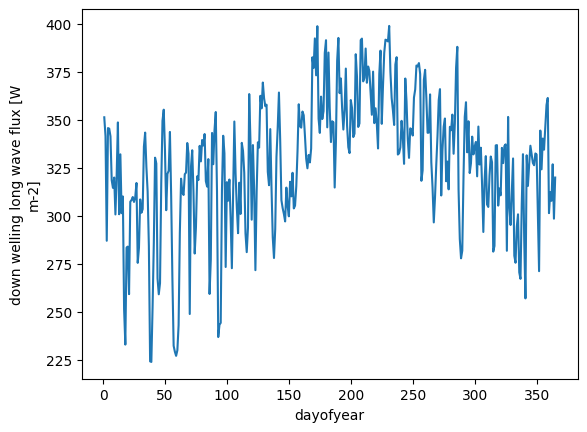

In [ ]:
lw_mean = jue_lw.rlds.groupby('time.dayofyear').mean()
lw_mean.plot()

In [75]:
import os
import xarray as xr

# Assuming datadir is already defined
surface_rad_dir = os.path.join(datadir, 'surface_rad')

# Define the pattern to match the filenames of the NetCDF files you want to open
jue_sw = 'sups_joy_pyr00_l1_rsds*.nc'

# Use open_mfdataset to open and concatenate the files into a single dataset
jue_sw = xr.open_mfdataset(os.path.join(surface_rad_dir, jue_sw))

# Print the combined dataset to see the structure
print(jue_sw)


<xarray.Dataset>
Dimensions:     (time: 6298492, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(17280, 2), meta=np.ndarray>
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rsds        (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
    rsds_error  (time) float32 dask.array<chunksize=(17280,), meta=np.ndarray>
Attributes:
    Title:            Downwelling shortwave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyranometer CMP21
    History:          Data processed by IEK-8 and writte

In [ ]:
import xarray as xr

# Assuming `data` is your xarray Dataset
# Load your dataset into `data`

# Print the time coordinate variable
print(jue_lw['time'])

# Calculate the time interval between each timestamp
time_diff = jue_lw['time'].diff(dim='time')
print(time_diff)


<xarray.DataArray 'time' (time: 6298538)>
array(['2023-01-01T00:00:03.000000000', '2023-01-01T00:00:08.000000000',
       '2023-01-01T00:00:13.000000000', ..., '2023-12-31T23:59:43.000000000',
       '2023-12-31T23:59:48.000000000', '2023-12-31T23:59:53.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:59:53
Attributes:
    standard_name:  time
    long_name:      time
    comments:       mid of averaging period
    bounds:         time_bnds
<xarray.DataArray 'time' (time: 6298537)>
array([5000000000, 5000000000, 5000000000, ..., 5000000000, 5000000000,
       5000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01T00:00:08 ... 2023-12-31T23:59:53


In [76]:
jue_sw.load()

<xarray.Dataset>
Dimensions:     (time: 6298492, nv: 2)
Coordinates:
  * time        (time) datetime64[ns] 2023-01-01T00:00:03 ... 2023-12-31T23:5...
Dimensions without coordinates: nv
Data variables:
    time_bnds   (time, nv) datetime64[ns] 2023-01-01T00:00:00.500000 ... 2023...
    zsl         (time) int16 111 111 111 111 111 111 ... 111 111 111 111 111 111
    lat         (time) float32 50.91 50.91 50.91 50.91 ... 50.91 50.91 50.91
    lon         (time) float32 6.414 6.414 6.414 6.414 ... 6.414 6.414 6.414
    rsds        (time) float32 -0.0 -0.0 -0.0 -0.0 -0.0 ... 0.4 0.4 0.4 0.4 0.4
    rsds_error  (time) float32 3.0 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0
Attributes:
    Title:            Downwelling shortwave irradiance
    Institution:      Research Center Juelich, Institute for Energy and Clima...
    Contact_person:   Birger Bohn (b.bohn@fz-juelich.de)
    Source:           Kipp & Zonen pyranometer CMP21
    History:          Data processed by IEK-8 and written with radiation2nc_h...
    Conventions:      CF-1.6 where applicable
    Processing_date:  2023-06-15 17:14:13 (CET)
    Author:           Anne Hirsikko (anne.hirsikko@fmi.fi)
    Comments:          
    License:          For non-commercial use only. This data is subject to th...

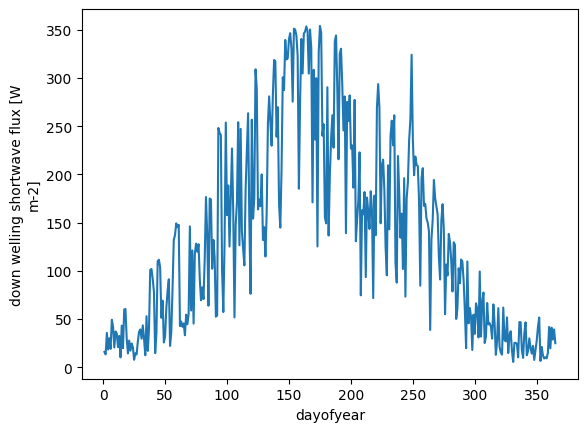

In [78]:
jue_sw_mean = jue_sw.rsds.groupby('time.dayofyear').mean()
jue_sw_mean.plot()

open_dataset
Purpose: Opens a single netCDF file.
Usage: Use open_dataset when you have a single netCDF file that you want to load into an xarray dataset:
ds = xarray.open_dataset('path_to_file.nc')

open_mfdataset
Purpose: Opens multiple netCDF files as a single xarray dataset.
Usage: Use open_mfdataset when you have a collection of netCDF files that you want to combine into a single xarray dataset. This is useful for working with time series data split across multiple files:
ds = xarray.open_mfdataset('path_to_files*.nc')

In [7]:
datadir=drivedir+'/MyDrive/METERS/2024METRS_project_data/nyalesund/'
libsdir_path=drivedir+'/MyDrive/METERS/2024METRS_project_data/nyalesund/'
print (os.listdir(datadir))

['cloudnet_iwc', 'cloudnet_lwp', 'cloudnet_class', 'surface_rad']


In [8]:
import os

# Define the path to the surface_rad directory
surface_rad_dir = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/'

# List files in the surface_rad directory
surface_rad_files = os.listdir(surface_rad_dir)
print(surface_rad_files)


['20230102_NYA_radiation.nc', '20230113_NYA_radiation.nc', '20230105_NYA_radiation.nc', '20230106_NYA_radiation.nc', '20230111_NYA_radiation.nc', '20230101_NYA_radiation.nc', '20230109_NYA_radiation.nc', '20230107_NYA_radiation.nc', '20230112_NYA_radiation.nc', '20230104_NYA_radiation.nc', '20230108_NYA_radiation.nc', '20230103_NYA_radiation.nc', '20230110_NYA_radiation.nc', '20230411_NYA_radiation.nc', '20230314_NYA_radiation.nc', '20230714_NYA_radiation.nc', '20230614_NYA_radiation.nc', '20231011_NYA_radiation.nc', '20231217_NYA_radiation.nc', '20230815_NYA_radiation.nc', '20230710_NYA_radiation.nc', '20230122_NYA_radiation.nc', '20230914_NYA_radiation.nc', '20230312_NYA_radiation.nc', '20230718_NYA_radiation.nc', '20230901_NYA_radiation.nc', '20230115_NYA_radiation.nc', '20230628_NYA_radiation.nc', '20231008_NYA_radiation.nc', '20231231_NYA_radiation.nc', '20230612_NYA_radiation.nc', '20230225_NYA_radiation.nc', '20230919_NYA_radiation.nc', '20230907_NYA_radiation.nc', '20230415_NYA

In [151]:
import os
import netCDF4 as nc

# Define the path to the surface_rad directory
surface_rad_dir = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/'

# List files in the surface_rad directory
surface_rad_files = os.listdir(surface_rad_dir)
print("Files in surface_rad directory:", surface_rad_files)

# Read and display basic information from each NetCDF file
for file in surface_rad_files:
    file_path = os.path.join(surface_rad_dir, file)
    with nc.Dataset(file_path) as ds:
        print(f"\nFile: {file}")
        print(f"Dimensions: {ds.dimensions.keys()}")
        print(f"Variables: {ds.variables.keys()}")
        # Display more detailed information if needed
        # for var in ds.variables.keys():
        #     print(f"Variable {var}: {ds.variables[var]}")


Files in surface_rad directory: ['20230102_NYA_radiation.nc', '20230113_NYA_radiation.nc', '20230105_NYA_radiation.nc', '20230106_NYA_radiation.nc', '20230111_NYA_radiation.nc', '20230101_NYA_radiation.nc', '20230109_NYA_radiation.nc', '20230107_NYA_radiation.nc', '20230112_NYA_radiation.nc', '20230104_NYA_radiation.nc', '20230108_NYA_radiation.nc', '20230103_NYA_radiation.nc', '20230110_NYA_radiation.nc', '20230411_NYA_radiation.nc', '20230314_NYA_radiation.nc', '20230714_NYA_radiation.nc', '20230614_NYA_radiation.nc', '20231011_NYA_radiation.nc', '20231217_NYA_radiation.nc', '20230815_NYA_radiation.nc', '20230710_NYA_radiation.nc', '20230122_NYA_radiation.nc', '20230914_NYA_radiation.nc', '20230312_NYA_radiation.nc', '20230718_NYA_radiation.nc', '20230901_NYA_radiation.nc', '20230115_NYA_radiation.nc', '20230628_NYA_radiation.nc', '20231008_NYA_radiation.nc', '20231231_NYA_radiation.nc', '20230612_NYA_radiation.nc', '20230225_NYA_radiation.nc', '20230919_NYA_radiation.nc', '20230907_

Data are recorded every minute, then the 1440 data points might represent the data for a 24-hour period, as there are 24 hours in a day and 60 minutes in an hour, resulting in 24 * 60 = 1440 minutes in a day.

In [140]:
time = combined_dataset ['time']

In [141]:
print(time)

<xarray.DataArray 'time' (temporal_grid: 1440)>
dask.array<open_dataset-time, shape=(1440,), dtype=float32, chunksize=(1440,), chunktype=numpy.ndarray>
Dimensions without coordinates: temporal_grid
Attributes:
    units:      decimal hours since 00:00:00
    long_name:  Time UTC


In [142]:
aly_swd = combined_dataset ['swd']

In [143]:
print(aly_swd)

<xarray.DataArray 'swd' (temporal_grid: 1440)>
dask.array<open_dataset-swd, shape=(1440,), dtype=float32, chunksize=(1440,), chunktype=numpy.ndarray>
Dimensions without coordinates: temporal_grid
Attributes:
    units:      W m-2
    long_name:  Short-wave downward (GLOBAL) radiation


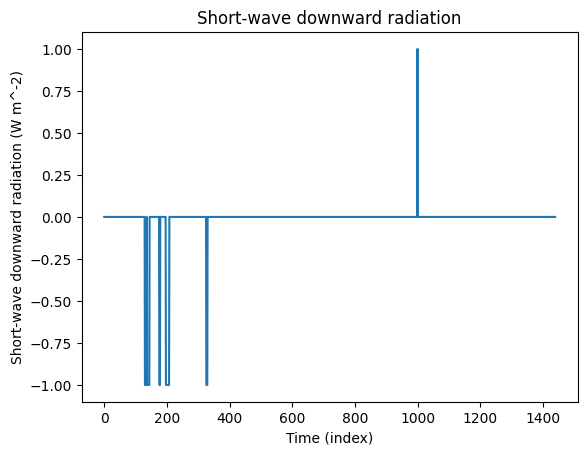

In [129]:
import matplotlib.pyplot as plt

# Extract the 'swd' variable
swd = combined_dataset['swd']

# Plot the 'swd' variable
swd.plot()

# Add labels and title
plt.xlabel('Time (index)')
plt.ylabel('Short-wave downward radiation (W m^-2)')
plt.title('Short-wave downward radiation')

# Show the plot
plt.show()


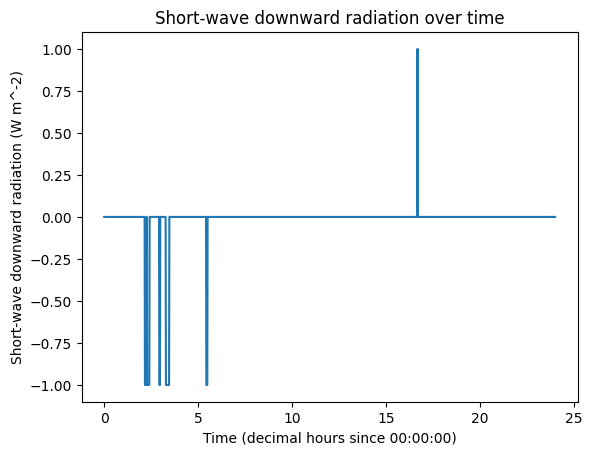

In [130]:
import matplotlib.pyplot as plt

# Extract the 'time' and 'swd' variables
time = combined_dataset['time']
swd = combined_dataset['swd']

# Plot 'swd' against 'time'
plt.plot(time, swd)

# Add labels and title
plt.xlabel('Time (decimal hours since 00:00:00)')
plt.ylabel('Short-wave downward radiation (W m^-2)')
plt.title('Short-wave downward radiation over time')

# Show the plot
plt.show()


In [134]:
# Print the number of time values
print("Number of time values:", len(time))


Number of time values: 1440


In [110]:
import pandas as pd
import numpy as np
import xarray as xr

# Define the start time (00:00:00)
start_time = pd.Timestamp('2023-01-01')

# Define the time step (in hours)
time_step = 1.0 / 60.0  # 1 minute in decimal hours

# Create the time coordinate array
time_values = np.arange(0, 525600) * time_step
time_index = pd.to_timedelta(time_values, unit='h') + start_time

# Create a new DataArray with the time coordinate
time_da = xr.DataArray(time_index, dims=['temporal_grid'], coords={'temporal_grid': np.arange(525600)})

# Assign the time coordinate to the DataArray
aly_swd = aly_swd.assign_coords(time=time_da)


ValueError: conflicting sizes for dimension 'temporal_grid': length 1440 on <this-array> and length 525600 on {'temporal_grid': 'temporal_grid'}

In [ ]:
import netCDF4 as nc

# Define the path to the NetCDF file
nc_file_path = '/content/drive/MyDrive/METERS/2024METRS_project_data/nyalesund/surface_rad/20230101_NYA_radiation.nc'

# Open the NetCDF file
nc_file = nc.Dataset(nc_file_path)

# Access the data associated with the 'swd' variable
swd_data = nc_file['swd'][:]

# Close the NetCDF file
nc_file.close()

# Now you can work with the swd_data array
print(swd_data)


[0. 0. 0. ... 0. 0. 0.]


<ipython-input-55-ac18bae33a32>:10: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  swd_data = nc_file['swd'][:]


-with * you can import all the files with the entire without importing one by one

-mean of the measurements(thousand) of the day

-problem with decimal hours try to fix
computing the max and it shows two peaks  (the max should be in the 21 of june)

-mean hour value for the case of clear sky checking the the smooth curve of sw
looking to lwp and looking also to error of lwp

-looking to temperature and select model height near surface and try transpose

-Radiation data: try to combine save date as datetime

-drop all the variables that we don't need it

-filter the joulich radiation with clear sky time step finding the time step where the detection status = 0 so when ther is clear sky.